In [2]:
import pandas as pd
#雙主修資料匯入
file = ".\data\DoubleMajor(105~110).csv"
dfDoubleMajor = pd.read_csv(file)
dfDoubleMajor.head()

In [ ]:
regiondata = ".\data\college_region.csv"
#大專院校資料匯入
dfRegion = pd.read_csv(regiondata)
dfRegion["縣市名稱"] = dfRegion["縣市名稱"].str.replace(r"\[\d+\]", "")
dfRegion.head()

C:\Users\Pang\AppData\Local\Temp\ipykernel_12848\3000998381.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,代碼,學校名稱,公/私立,縣市名稱,地址,電話,網址,體系別
0,1,國立政治大學,公立,臺北市,[116]臺北市文山區指南路二段64號,(02)29393091,http://www.nccu.edu.tw,[1]一般
1,2,國立清華大學,公立,新竹市,[300]新竹市東區光復路二段101號,(03)5715131,http://www.nthu.edu.tw,[1]一般
2,3,國立臺灣大學,公立,臺北市,[106]臺北市大安區羅斯福路四段1號,(02)33663366,http://www.ntu.edu.tw,[1]一般
3,4,國立臺灣師範大學,公立,臺北市,[106]臺北市大安區和平東路一段162號,(02)77491111,http://www.ntnu.edu.tw,[3]師範
4,5,國立成功大學,公立,臺南市,[701]臺南市東區大學路1號,(06)2757575,http://www.ncku.edu.tw,[1]一般


In [ ]:
#加上縣市作為參照
dfregiondoublemajor = pd.merge(dfDoubleMajor, dfRegion.loc[:,['學校名稱','縣市名稱']],how = 'left', on = '學校名稱')
dfregiondoublemajor

,學年度,學期,設立別,學校類別,學校統計處代碼,學校名稱,系所代碼,系所名稱,學制班別,修讀雙主修人次小計,修讀雙主修人次男,修讀雙主修人次女,縣市名稱
0,105,1,公立,一般大學,1,國立政治大學,01111001,教育學系,學士班(日間),49,18,31,臺北市
1,105,1,公立,一般大學,1,國立政治大學,02221020,歷史學系,學士班(日間),29,19,10,臺北市
2,105,1,公立,一般大學,1,國立政治大學,02222031,民族學系,學士班(日間),37,7,30,臺北市
3,105,1,公立,一般大學,1,國立政治大學,02231022,哲學系,學士班(日間),30,10,20,臺北市
4,105,1,公立,一般大學,1,國立政治大學,02311009,英國語文學系,學士班(日間),52,17,35,臺北市
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,110,2,公立,一般大學,3002,臺北市立大學,10141060,球類運動學系,學士班(日間),3,1,2,臺北市
15994,110,2,公立,一般大學,3002,臺北市立大學,10141062,陸上運動學系,學士班(日間),1,1,0,臺北市
15995,110,2,公立,一般大學,3002,臺北市立大學,10141063,水上運動學系,學士班(日間),9,4,5,臺北市
15996,110,2,公立,一般大學,3002,臺北市立大學,10142052,運動健康科學系,學士班(日間),1,1,0,臺北市


In [ ]:
#看不出東西QQ
fig = go.Figure()

fig.add_trace(go.Violin(x=dfregiondoublemajor['縣市名稱'],
                        y=dfregiondoublemajor['修讀雙主修人次男'],
                        legendgroup='男', scalegroup='男', name='男',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=dfregiondoublemajor['縣市名稱'],
                        y=dfregiondoublemajor['修讀雙主修人次女'],
                        legendgroup='女', scalegroup='女', name='女',
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

In [ ]:
#這也看不太出東西
df_grouped = dfregiondoublemajor.groupby('縣市名稱').sum()

# 產生堆疊條形圖
fig = px.bar(df_grouped, x=df_grouped.index, y=['修讀雙主修人次男', '修讀雙主修人次女'], barmode='stack')

# 設定圖表標題和標籤名稱
fig.update_layout(title='不同縣市中男女修讀雙主修人次的比例',
                  xaxis_title='縣市名稱',
                  yaxis_title='修讀雙主修人次')

# 顯示圖表
fig.show()

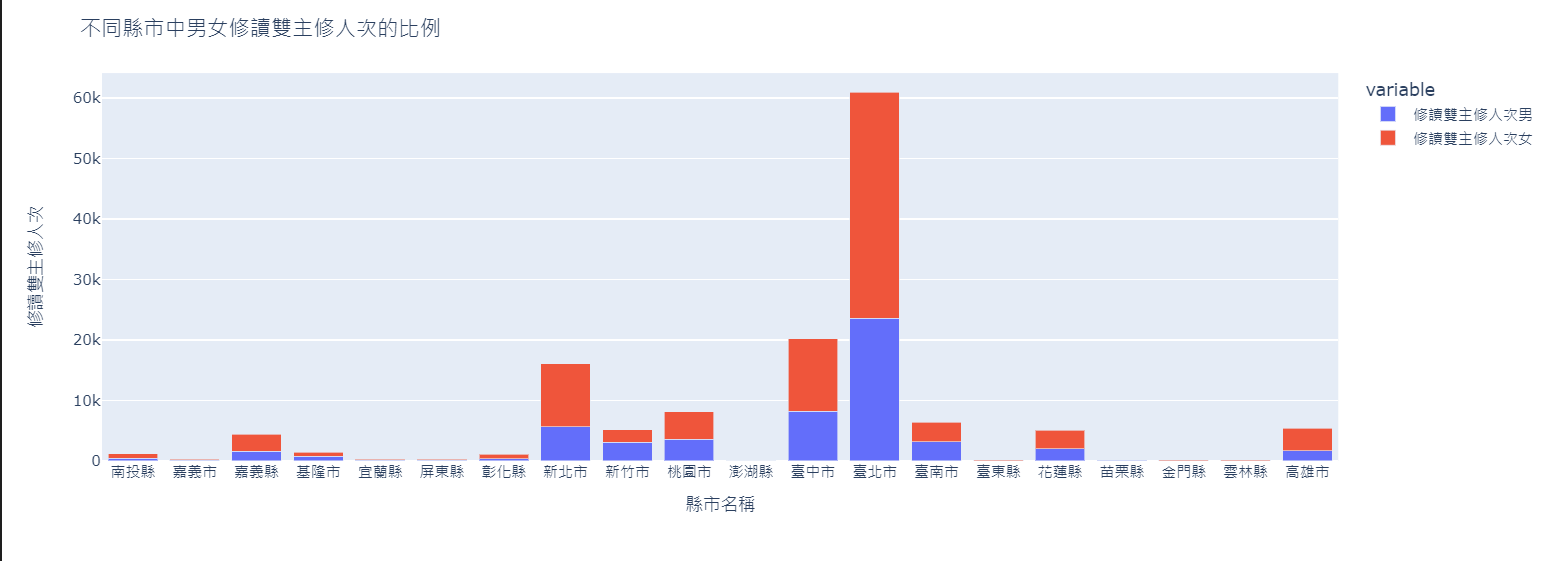

In [ ]:
df = dfregiondoublemajor[['學校名稱', '學年度', '縣市名稱', '修讀雙主修人次男', '修讀雙主修人次女', '修讀雙主修人次小計']].groupby(['學年度', '學校名稱', '縣市名稱']).sum().reset_index()
df = df.assign(男比例 = df['修讀雙主修人次男'] / df['修讀雙主修人次小計'])
df = df.assign(女比例 = df['修讀雙主修人次女'] / df['修讀雙主修人次小計'])
df['男比例'] = df['男比例'].apply(lambda x: '{:.1%}'.format(x))
df['女比例'] = df['女比例'].apply(lambda x: '{:.1%}'.format(x))
df = df.rename(columns={'男比例': '男/整體'})
df = df.rename(columns={'女比例': '女/整體'})

collegeyearsex = df
collegeyearsex

,學年度,學校名稱,縣市名稱,修讀雙主修人次男,修讀雙主修人次女,修讀雙主修人次小計,男/整體,女/整體
0,105,世新大學,臺北市,53,291,344,15.4%,84.6%
1,105,中原大學,桃園市,60,211,271,22.1%,77.9%
2,105,中國文化大學,臺北市,155,347,502,30.9%,69.1%
3,105,中國科技大學,臺北市,4,7,11,36.4%,63.6%
4,105,中國醫藥大學,臺中市,536,431,967,55.4%,44.6%
...,...,...,...,...,...,...,...,...
510,110,開南大學,桃園市,11,13,24,45.8%,54.2%
511,110,靜宜大學,臺中市,214,358,572,37.4%,62.6%
512,110,高苑科技大學,高雄市,2,0,2,100.0%,0.0%
513,110,高雄醫學大學,高雄市,20,60,80,25.0%,75.0%


In [ ]:
#看不出東西(每所學校人數不同，不能直接看男女人數)
fig = px.scatter(collegeyearsex.query("學年度==110"), x="修讀雙主修人次男", y="修讀雙主修人次女",
	         size="修讀雙主修人次小計", color="縣市名稱",
                 hover_name="學校名稱", log_x=True, size_max=60)
fig.update_layout(title='不同學校男女修讀雙主修人次的比例')
fig.show()

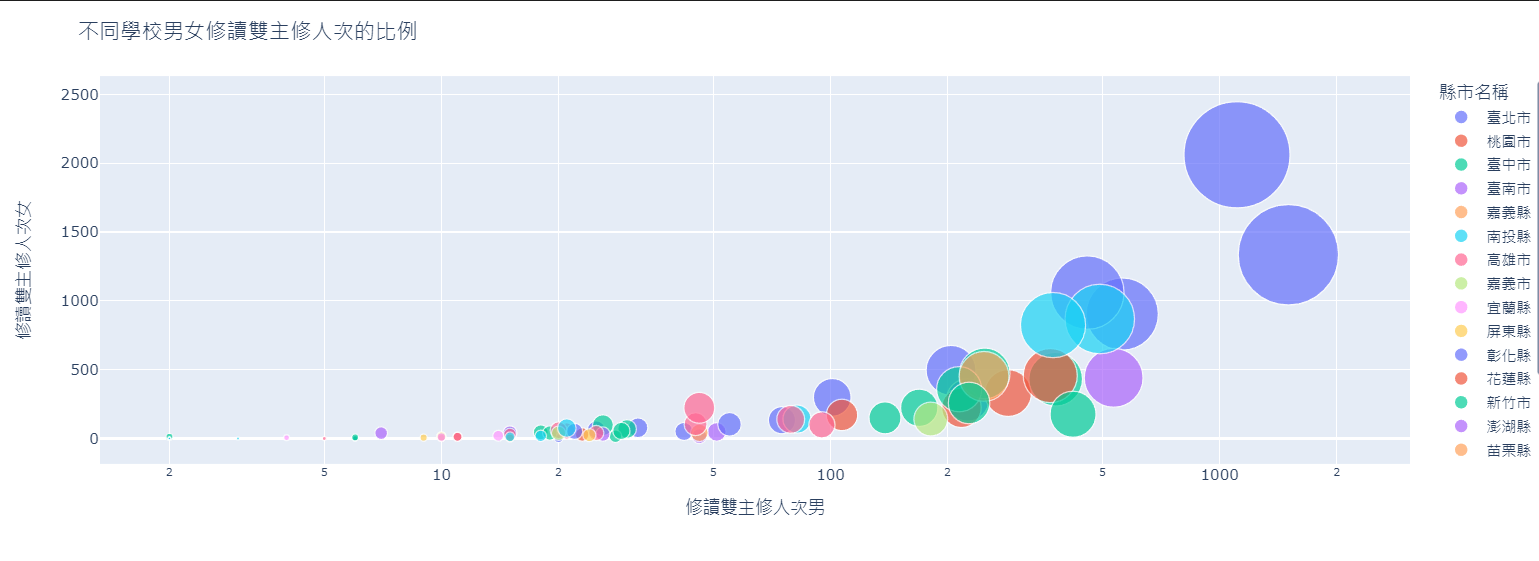

In [ ]:
fig = px.scatter(collegeyearsex.query("學年度==110"), x="男/整體", y="修讀雙主修人次小計",
	         size="修讀雙主修人次小計", color="縣市名稱",
                 hover_name="學校名稱", log_x=True, size_max=60)
fig.update_layout(title='110學年不同學校男生修讀雙主修比例')
fig.show()

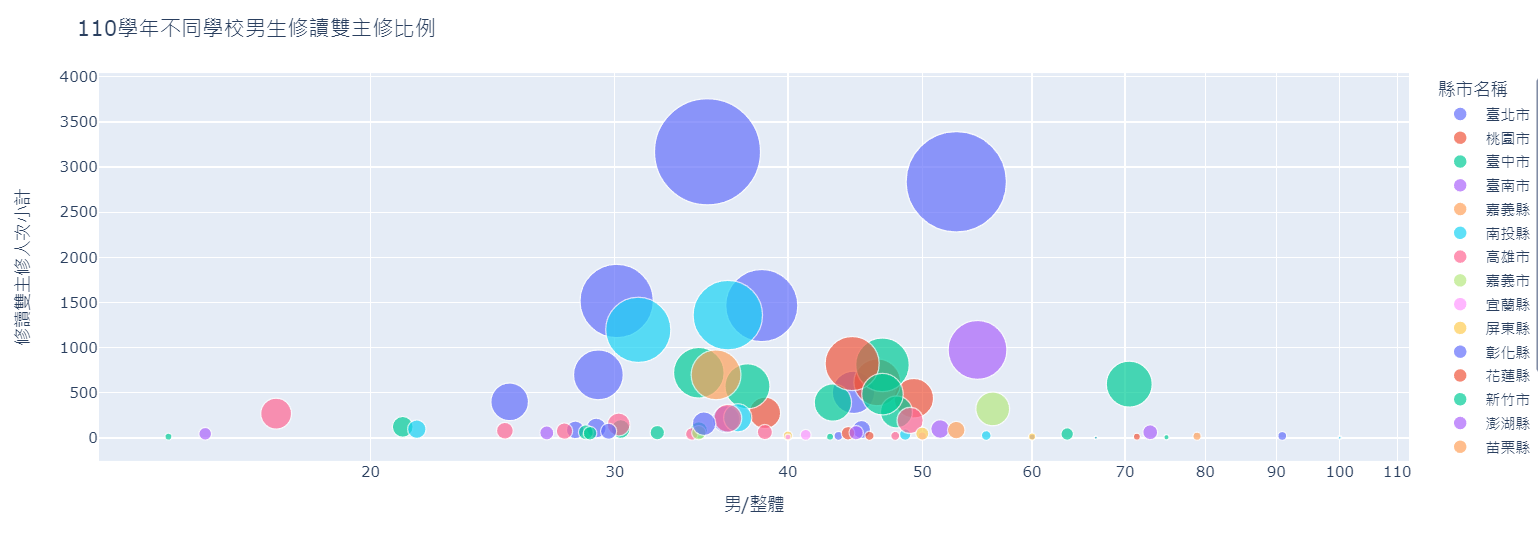

In [ ]:
# 以for迴圈逐一建立圖表
figs = {}
for year in range(105, 110+1):
    fig = px.scatter(collegeyearsex.query(f"學年度=={year}"), x="男/整體", y="修讀雙主修人次小計",
                     size="修讀雙主修人次小計", color="縣市名稱",
                     hover_name="學校名稱", log_x=True, size_max=60)
    fig.update_layout(title=f"{year}學年不同學校男生修讀雙主修比例")
    figs[f'fig{year}'] = fig
for year in range(105, 110+1):
    figs[f'fig{year}'].show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Pang\AppData\Local\Temp\ipykernel_10120\2868737265.py", line 4, in <module>
    fig = px.scatter(collegeyearsex.query(f"學年度=={year}"), x="男/整體", y="修讀雙主修人次小計",
NameError: name 'px' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\Program Files\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_o

TypeError: object of type 'NoneType' has no len()

In [ ]:


# 建立一個空的figure物件
fig = px.scatter()

# 迴圈加入各個年份的散佈圖
for year in range(105, 110+1):
    data = collegeyearsex.query(f"學年度=={year}")
    fig.add_scatter(x=data["男/整體"], y=data["修讀雙主修人次小計"],
                    mode="markers",
                    name=f"{year}學年",
                    marker=dict(size=data["修讀雙主修人次小計"],
                                sizemode="area",
                                sizeref=2.*max(data["修讀雙主修人次小計"])/(60.**2),
                                sizemin=4))
    
# 更新figure物件的標題和x軸標籤
fig.update_layout(title="105~110學年不同學校男生修讀雙主修比例",
                  xaxis_title="男/整體")
    
# 顯示figure物件
fig.show()
